In [84]:
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
import cPickle as pickle
from fit_potentials import *
from fit_mrf import *
outcome = "outcome_num_crimes_30days_ALL"
with open("../../models/mrf/mrf-structure_{0}.p".format(outcome), "rb") as handle:
    mrf = pickle.load(handle)

In [86]:
import pandas as pd
cell_meta = pd.read_csv("../../models/cells/cells-dim-550-meta.csv", index_col=0)

In [87]:
cell_meta.loc[0]

x              7636968.559692
y               651688.588641
x0             7636454.588155
y0              651315.557759
nx                  60.000000
ny                   1.000000
x1             7637004.588155
y1              651865.557759
idwest                    NaN
idnorth             21.000000
ideast               1.000000
idsouth                   NaN
idnorthwest         20.000000
idnortheast         22.000000
idsouthwest               NaN
idsoutheast               NaN
area              6295.043928
num.crimes           0.000000
Name: 0, dtype: float64

In [88]:
import networkx as nx
g = nx.from_scipy_sparse_matrix(mrf.var_adjacency)

adj_ids = ["idwest", "idnorth", "ideast",
    "idsouth", "idnorthwest", "idnortheast", "idsouthwest", "idsoutheast"]

def get_adj_cells(cell_id):
    cur_meta = cell_meta.loc[cell_id]
    return [int(cur_meta[a]) for a in adj_ids if not np.isnan(cur_meta[a])]
    
def get_cell_subgraph_and_pos(cell_id, node_limit=100):
    visited = set([cell_id])
    queue = [cell_id]
    cur_depth = 0
    while queue and len(visited) < node_limit:
        current = queue.pop(0)
        for n in get_adj_cells(current):
            if not n in visited:
                visited.add(n)
                queue.append(n)
        
    group_cell_ids = list(visited)
    pos = dict()
    for gcell in group_cell_ids:
        pos[gcell] = (cell_meta.loc[gcell].nx, cell_meta.loc[gcell].ny)
        
    labels = dict(zip(group_cell_ids, group_cell_ids))
    s = nx.subgraph(g, group_cell_ids)
    
    return(s, pos, labels)

s0, s0pos, labels = get_cell_subgraph_and_pos(1000)

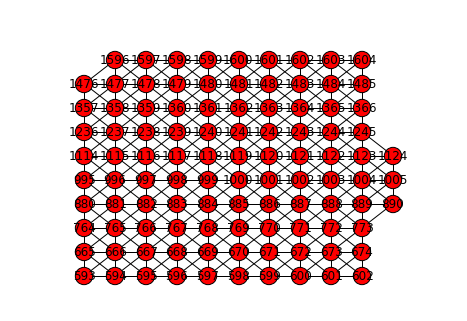

In [89]:
nx.draw(s0, show="ipynb", pos=s0pos, labels=labels)

In [72]:
mrf.has_tied_weights

True